<a href="https://colab.research.google.com/github/Avinash-Reddy-Kovvuri/Deep-Learning-_-Pytorch/blob/main/Inferencing_GrayScaleIMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [ ]:

#Hyperparameters
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [ ]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.304953  [    0/60000]
loss: 2.307379  [ 6400/60000]
loss: 2.289756  [12800/60000]
loss: 2.286545  [19200/60000]
loss: 2.283083  [25600/60000]
loss: 2.278819  [32000/60000]
loss: 2.261913  [38400/60000]
loss: 2.272245  [44800/60000]
loss: 2.264539  [51200/60000]
loss: 2.236707  [57600/60000]
Test Error: 
 Accuracy: 44.0%, Avg loss: 2.251014 

Epoch 2
-------------------------------
loss: 2.250082  [    0/60000]
loss: 2.251514  [ 6400/60000]
loss: 2.245439  [12800/60000]
loss: 2.211890  [19200/60000]
loss: 2.226208  [25600/60000]
loss: 2.221961  [32000/60000]
loss: 2.191407  [38400/60000]
loss: 2.221440  [44800/60000]
loss: 2.192692  [51200/60000]
loss: 2.155482  [57600/60000]
Test Error: 
 Accuracy: 55.5%, Avg loss: 2.176149 

Epoch 3
-------------------------------
loss: 2.172324  [    0/60000]
loss: 2.169357  [ 6400/60000]
loss: 2.177413  [12800/60000]
loss: 2.102996  [19200/60000]
loss: 2.138866  [25600/60000]
loss: 2.131535  [32000/600

Above code is same as in above note book where feed-forward neural network is defined and backward propogation is used in training the neural network along with defined hyperparameters , cross-entropy loss function , stochastic gradient descent(SGD)

**Inferencing - the process of using a trained DNN model to make predictions against previously unseen data.**


*   To do that, a gray scale image of an handwritten digit is downloaded from the google.
*   And its pixels were crop down to 28 * 28 ( width & height) which results an black colored image with no digit on it 



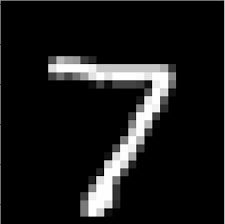

In [ ]:
# Import the necessary libraries
from PIL import Image

img = Image.open("/content/Deep.png")
img

In [ ]:
from torchvision import transforms
convert_tensor = transforms.ToTensor()
final = convert_tensor(img)
final

tensor([[[0.1608, 0.1373, 0.0078,  ..., 0.0078, 0.1333, 0.0588],
         [0.1373, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0353],
         [0.0078, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0157],
         ...,
         [0.0078, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0157],
         [0.0078, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0157],
         [0.0078, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0157]]])

In [ ]:
final.shape

torch.Size([1, 224, 225])

In [ ]:
tt = img.crop((196,197,224,225))

In [ ]:
tt

In [ ]:
final2 = convert_tensor(tt)
final2.shape

torch.Size([1, 28, 28])

In [ ]:
pred =model(final2)
pred

tensor([[-1.4993e-01,  1.6613e-01, -4.8352e-02, -2.8850e-02,  1.8887e-02,
          2.1781e-05,  5.0407e-03,  7.0002e-02, -4.2140e-02,  4.8008e-03]],
       grad_fn=<AddmmBackward0>)

In [ ]:
pred_probab = nn.Softmax(dim=1)(pred)
y_pred = pred_probab.argmax(1)
print(y_pred)

tensor([1])


After doing all the above mentioned , finally prediction resultant an number (0-9) in the image as 1 (Hand-written Digit).